**Introduction**

- This project aims to analyze a dataset of used vehicles and build a predictive model to estimate the selling prices of cars.
- The dataset includes variables such as car features, mileage, fuel type, and engine specifications.
- Through exploratory data analysis, we uncover key relationships between the variables and implement machine learning techniques to create a reliable prediction model.
- The goal is to provide insights into the factors affecting car prices and to build a model that can accurately predict prices for unseen data.

In [43]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score

In [4]:
#loading the dataset
df = pd.read_csv(r'C:\Users\PC\Desktop\Datasets\Car details.csv')

In [5]:
#viewing the first five entries
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
df.shape

(8128, 13)

In [7]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

The data has some missing values in Mileage, Engine, max_power, torque and seats rows.

In [8]:
df = df.dropna(how = 'any')

df.shape

(7906, 13)

In [9]:
# Function to extract the largest number (RPM) from a string
def extract_rpm(value):
    numbers = re.findall(r'\d+', str(value))  # Find all numbers
    return max(map(int, numbers)) if numbers else None  # Return the maximum number

# Apply the function to the 'torque' column and create a new 'torque_rpm' column
df['torque_rpm'] = df['torque'].apply(extract_rpm)

# Display the first 2 rows to check the result
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500


In [10]:
# Function to extract numeric values from text (e.g. '190Nm @ 2000rpm' -> '190')
def extract_numeric(text):
    match = re.search(r'\d+', str(text))
    return float(match.group()) if match else None

# Apply the function to clean mileage, engine, max_power
df['mileage'] = df['mileage'].apply(extract_numeric)
df['engine'] = df['engine'].apply(extract_numeric)
df['max_power'] = df['max_power'].apply(extract_numeric)
df['torque'] = df['torque'].apply(extract_numeric)

In [11]:
# Results after cleaning
df[['mileage', 'engine', 'max_power','torque']].head()

,mileage,engine,max_power,torque
0,23.0,1248.0,74.0,190.0
1,21.0,1498.0,103.0,250.0
2,17.0,1497.0,78.0,12.0
3,23.0,1396.0,90.0,22.0
4,16.0,1298.0,88.0,11.0


In [12]:
df['fuel'].value_counts()

fuel
Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: count, dtype: int64

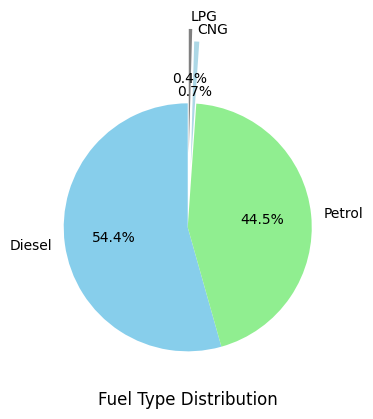

In [13]:
Fuel_Type = df['fuel'].value_counts()

labels = Fuel_Type.index
explode = (0, 0, 0.5, 0.6)
colors = ['skyblue', 'lightgreen', 'lightblue', 'gray']

plt.figure(figsize=(4, 6))
plt.pie(Fuel_Type, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors)

# Add title and display the plot
plt.title('Fuel Type Distribution', loc='center', y=-0.1)
plt.show()

Observation
- The pie chart titled “Fuel Type Distribution” shows the following:

Diesel: 54.4%
Petrol: 44.5%
CNG: 0.7%
LPG: 0.4%
Diesel is the most used fuel type, followed by Petrol. CNG and LPG have minimal usage.

In [14]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.0,190.0,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.0,1498.0,103.0,250.0,5.0,2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.0,12.0,5.0,700
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,22.0,5.0,2750
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.0,11.0,5.0,500


In [15]:
df['transmission'].value_counts()

transmission
Manual       6865
Automatic    1041
Name: count, dtype: int64

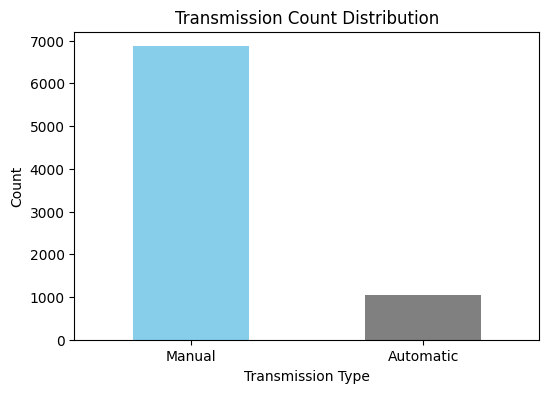

In [16]:
Transmission_Type = df['transmission'].value_counts()

plt.figure(figsize=(6, 4))
Transmission_Type.plot(kind='bar', color=['skyblue', 'gray'])

plt.title('Transmission Count Distribution')
plt.xlabel('Transmission Type')
plt.ylabel('Count')

# Display the plot
plt.xticks(rotation=0) 
plt.show()

Observation
- The bar chart titled “Transmission Count Distribution” shows that Manual transmissions have a significantly higher count compared to Automatic transmissions. This indicates a preference or higher availability of manual transmissions in the dataset.

In [17]:
df['seller_type'].value_counts()

seller_type
Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: count, dtype: int64

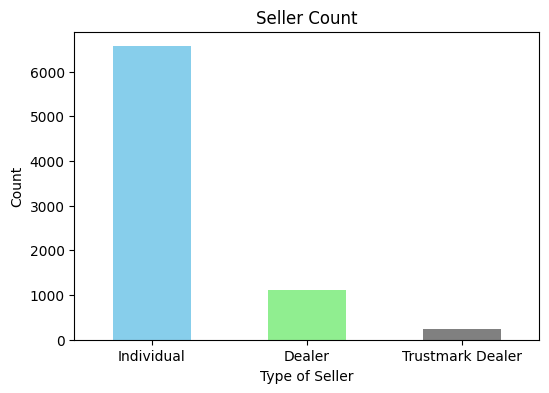

In [18]:
Seller_Type = df['seller_type'].value_counts()

plt.figure(figsize=(6, 4))
Seller_Type.plot(kind='bar', color=['skyblue', 'lightgreen','gray'])

plt.title('Seller Count')
plt.xlabel('Type of Seller')
plt.ylabel('Count')

plt.xticks(rotation=0) 
plt.show()

Observation
- The bar chart titled “Seller Count” shows that Individual sellers have the highest count, followed by Dealers and Trustmark Dealers. This indicates that individual sellers dominate the market in the dataset

In [21]:
df['owner'].value_counts()

owner
First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: count, dtype: int64

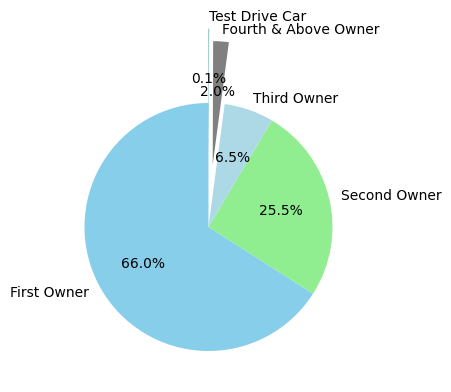

In [25]:
Owner_Type = df['owner'].value_counts()

labels = Owner_Type.index
explode = (0, 0, 0, 0.5, 0.6)
colors = ['skyblue', 'lightgreen', 'lightblue', 'gray','teal']

plt.figure(figsize=(4, 6))
plt.pie(Owner_Type, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors)
plt.show()

Observation
- Distribution” shows:

First Owner: 66.0%
Second Owner: 25.5%
Third Owner: 6.5%
Fourth & Above Owner: 2.0%
Test Drive Car: 0.1%
First owners dominate the distribution, indicating most test drive cars are from first-time owners.

**Influence of Engine Displacement Size on Fuel Millage**

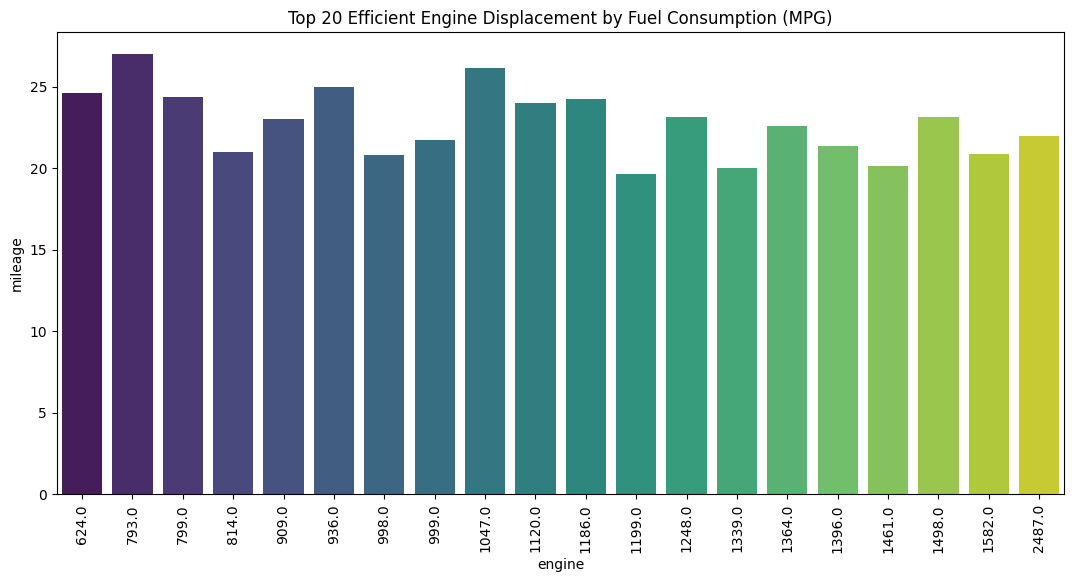

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by mileage in descending order and select the top 20
top_engines = df.groupby('engine')['mileage'].mean().nlargest(20).reset_index()

# Create the bar chart
plt.figure(figsize=(13, 6))
sns.barplot(x='engine', y='mileage', data=top_engines, palette='viridis')  # Using a color palette

plt.xticks(rotation=90)
plt.title("Top 20 Efficient Engine Displacement by Fuel Consumption (MPG)")
plt.show()

Observation
- The bar chart titled “Top 20 Efficient Engine Displacement by Fuel Consumption (MPG)” shows the fuel efficiency (MPG) of different engine displacements. The bars are color-coded to indicate various MPG ranges, highlighting the most efficient engines.

In [27]:
df['engine'].value_counts()

engine
1248.0    1017
1197.0     832
998.0      453
796.0      443
2179.0     389
          ... 
2835.0       1
1489.0       1
1422.0       1
2496.0       1
1950.0       1
Name: count, Length: 121, dtype: int64

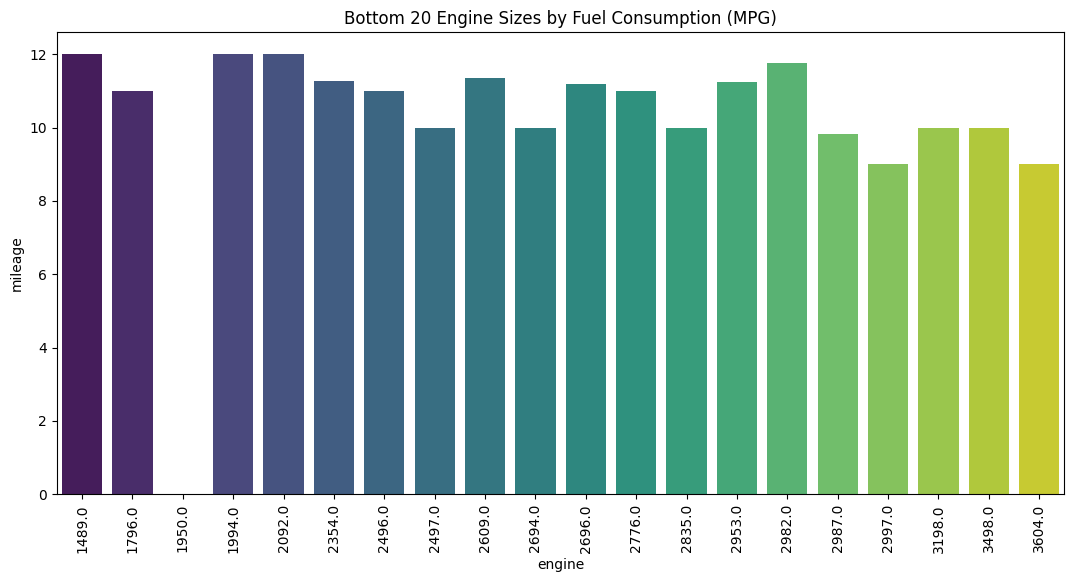

In [28]:
# Sort the DataFrame by mileage in ascending order and select the lowest 20
bottom_engines = df.groupby('engine')['mileage'].mean().nsmallest(20).reset_index()
plt.figure(figsize=(13, 6))
sns.barplot(x='engine', y='mileage', data=bottom_engines, palette='viridis')  # Using a color palette
plt.xticks(rotation=90)
plt.title("Bottom 20 Engine Sizes by Fuel Consumption (MPG)")

plt.show()

Observation
- The bar chart titled “Bottom 20 Engine Sizes by Fuel Consumption (MPG)” shows the least fuel-efficient engine sizes, with MPG values ranging from 0 to 12. The chart highlights the engine sizes that consume the most fuel, which is useful for identifying less efficient engines.

**Influence of Engine Displacement, Max_Power(HORSEPOWER) on Fuel**

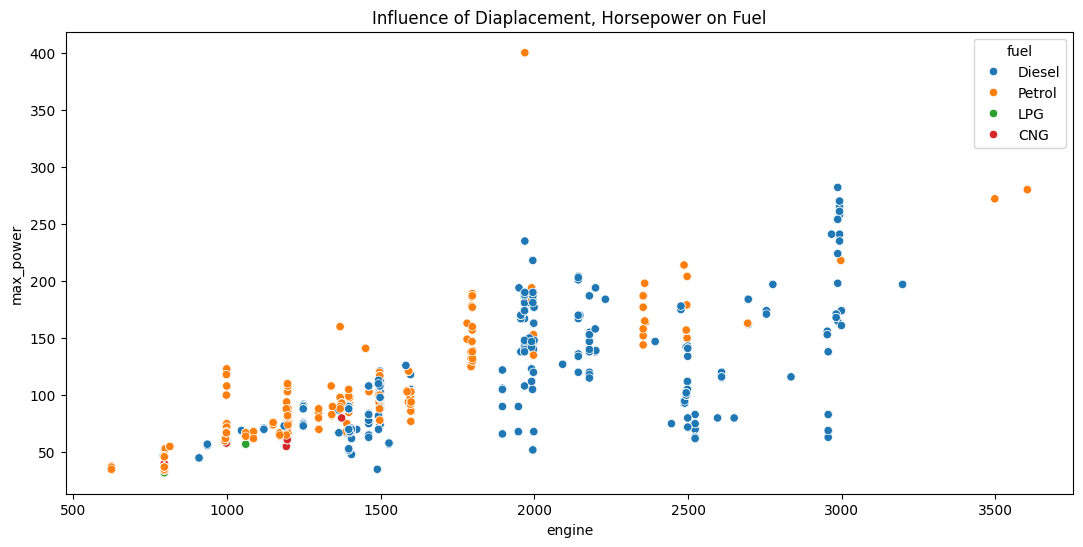

In [29]:
plt.figure(figsize=(13,6))
plt.title("Influence of Diaplacement, Horsepower on Fuel")
sns.scatterplot(x='engine', y='max_power',hue='fuel',data=df)
plt.show()

Observation
- The scatter plot titled “Influence of Displacement, Horsepower on Fuel” shows the relationship between engine displacement and horsepower for different fuel types (Diesel, Petrol, LPG, CNG). Each point represents a specific fuel type, highlighting how engine size and power output vary across fuels.

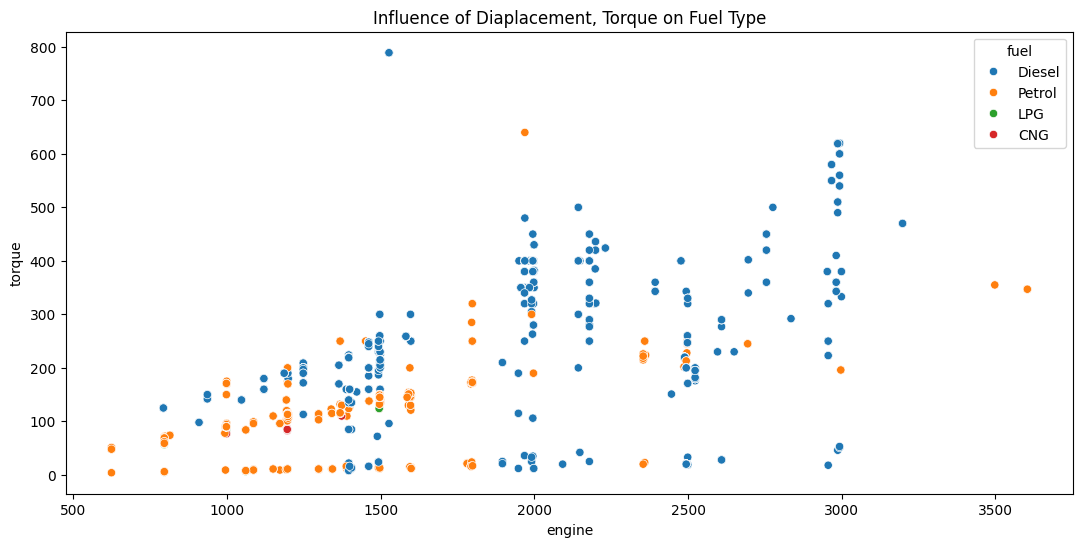

In [30]:
plt.figure(figsize=(13,6))
plt.title("Influence of Diaplacement, Torque on Fuel Type")
sns.scatterplot(x='engine', y='torque',hue='fuel',data=df)
plt.show()

Observation
- The scatter plot titled “Influence of Displacement, Torque on Fuel Type” shows the relationship between engine displacement and torque for different fuel types (Diesel, Petrol, LPG, CNG). The data points indicate that as engine displacement increases, torque generally increases as well.

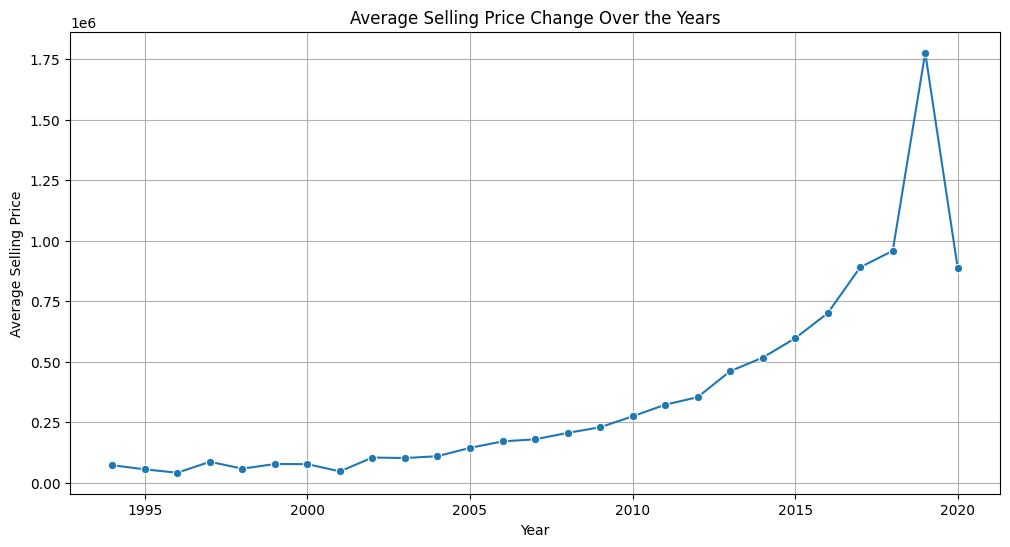

In [31]:
price_trends = df.groupby('year')['selling_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='selling_price', data=price_trends, marker='o')

# Add title and labels
plt.title("Average Selling Price Change Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Selling Price")
plt.grid(True) 
plt.show()

Observation
- The line graph titled “Average Selling Price Change Over the Years” shows a general upward trend in average selling prices from 1990 to 2020, with a significant spike towards the end. This indicates increasing prices over time.

In [32]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,torque_rpm
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,18.981027,1458.708829,91.271060,168.187579,5.416393,2955.117253
std,3.863695,8.135827e+05,5.679230e+04,4.064364,503.893057,35.732781,97.353926,0.959208,1052.997867
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.000000,4.000000,2.000000,6.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.000000,1197.000000,68.000000,101.000000,5.000000,2200.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.000000,1248.000000,82.000000,154.000000,5.000000,2800.000000
75%,2017.000000,6.900000e+05,9.542500e+04,22.000000,1582.000000,102.000000,202.000000,5.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,789.000000,14.000000,5300.000000


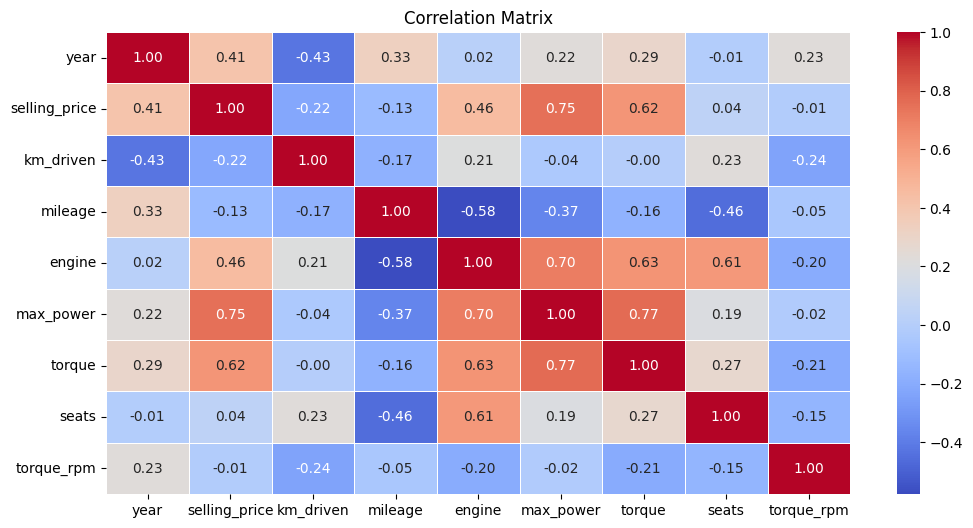

In [33]:
# Correlation matrix
plt.figure(figsize=(12,6))
corr_matrix = df[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'torque_rpm' ]].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Observation
- Strong correlations:

Selling Price is positively correlated with max_power (0.75) and torque (0.62), indicating cars with higher power and torque have higher selling prices.
Max Power and Torque are strongly correlated (0.77), as they are mechanically related.

- Negative correlations:

Selling Price is negatively correlated with km_driven (-0.22), meaning cars with more kilometers driven tend to have lower selling prices.
Mileage and Engine size are negatively correlated (-0.58), indicating that larger engines tend to result in lower fuel efficiency.

- Low correlations:

Seats shows little to no correlation with other features, making it less influential in determining the selling price or other variables.

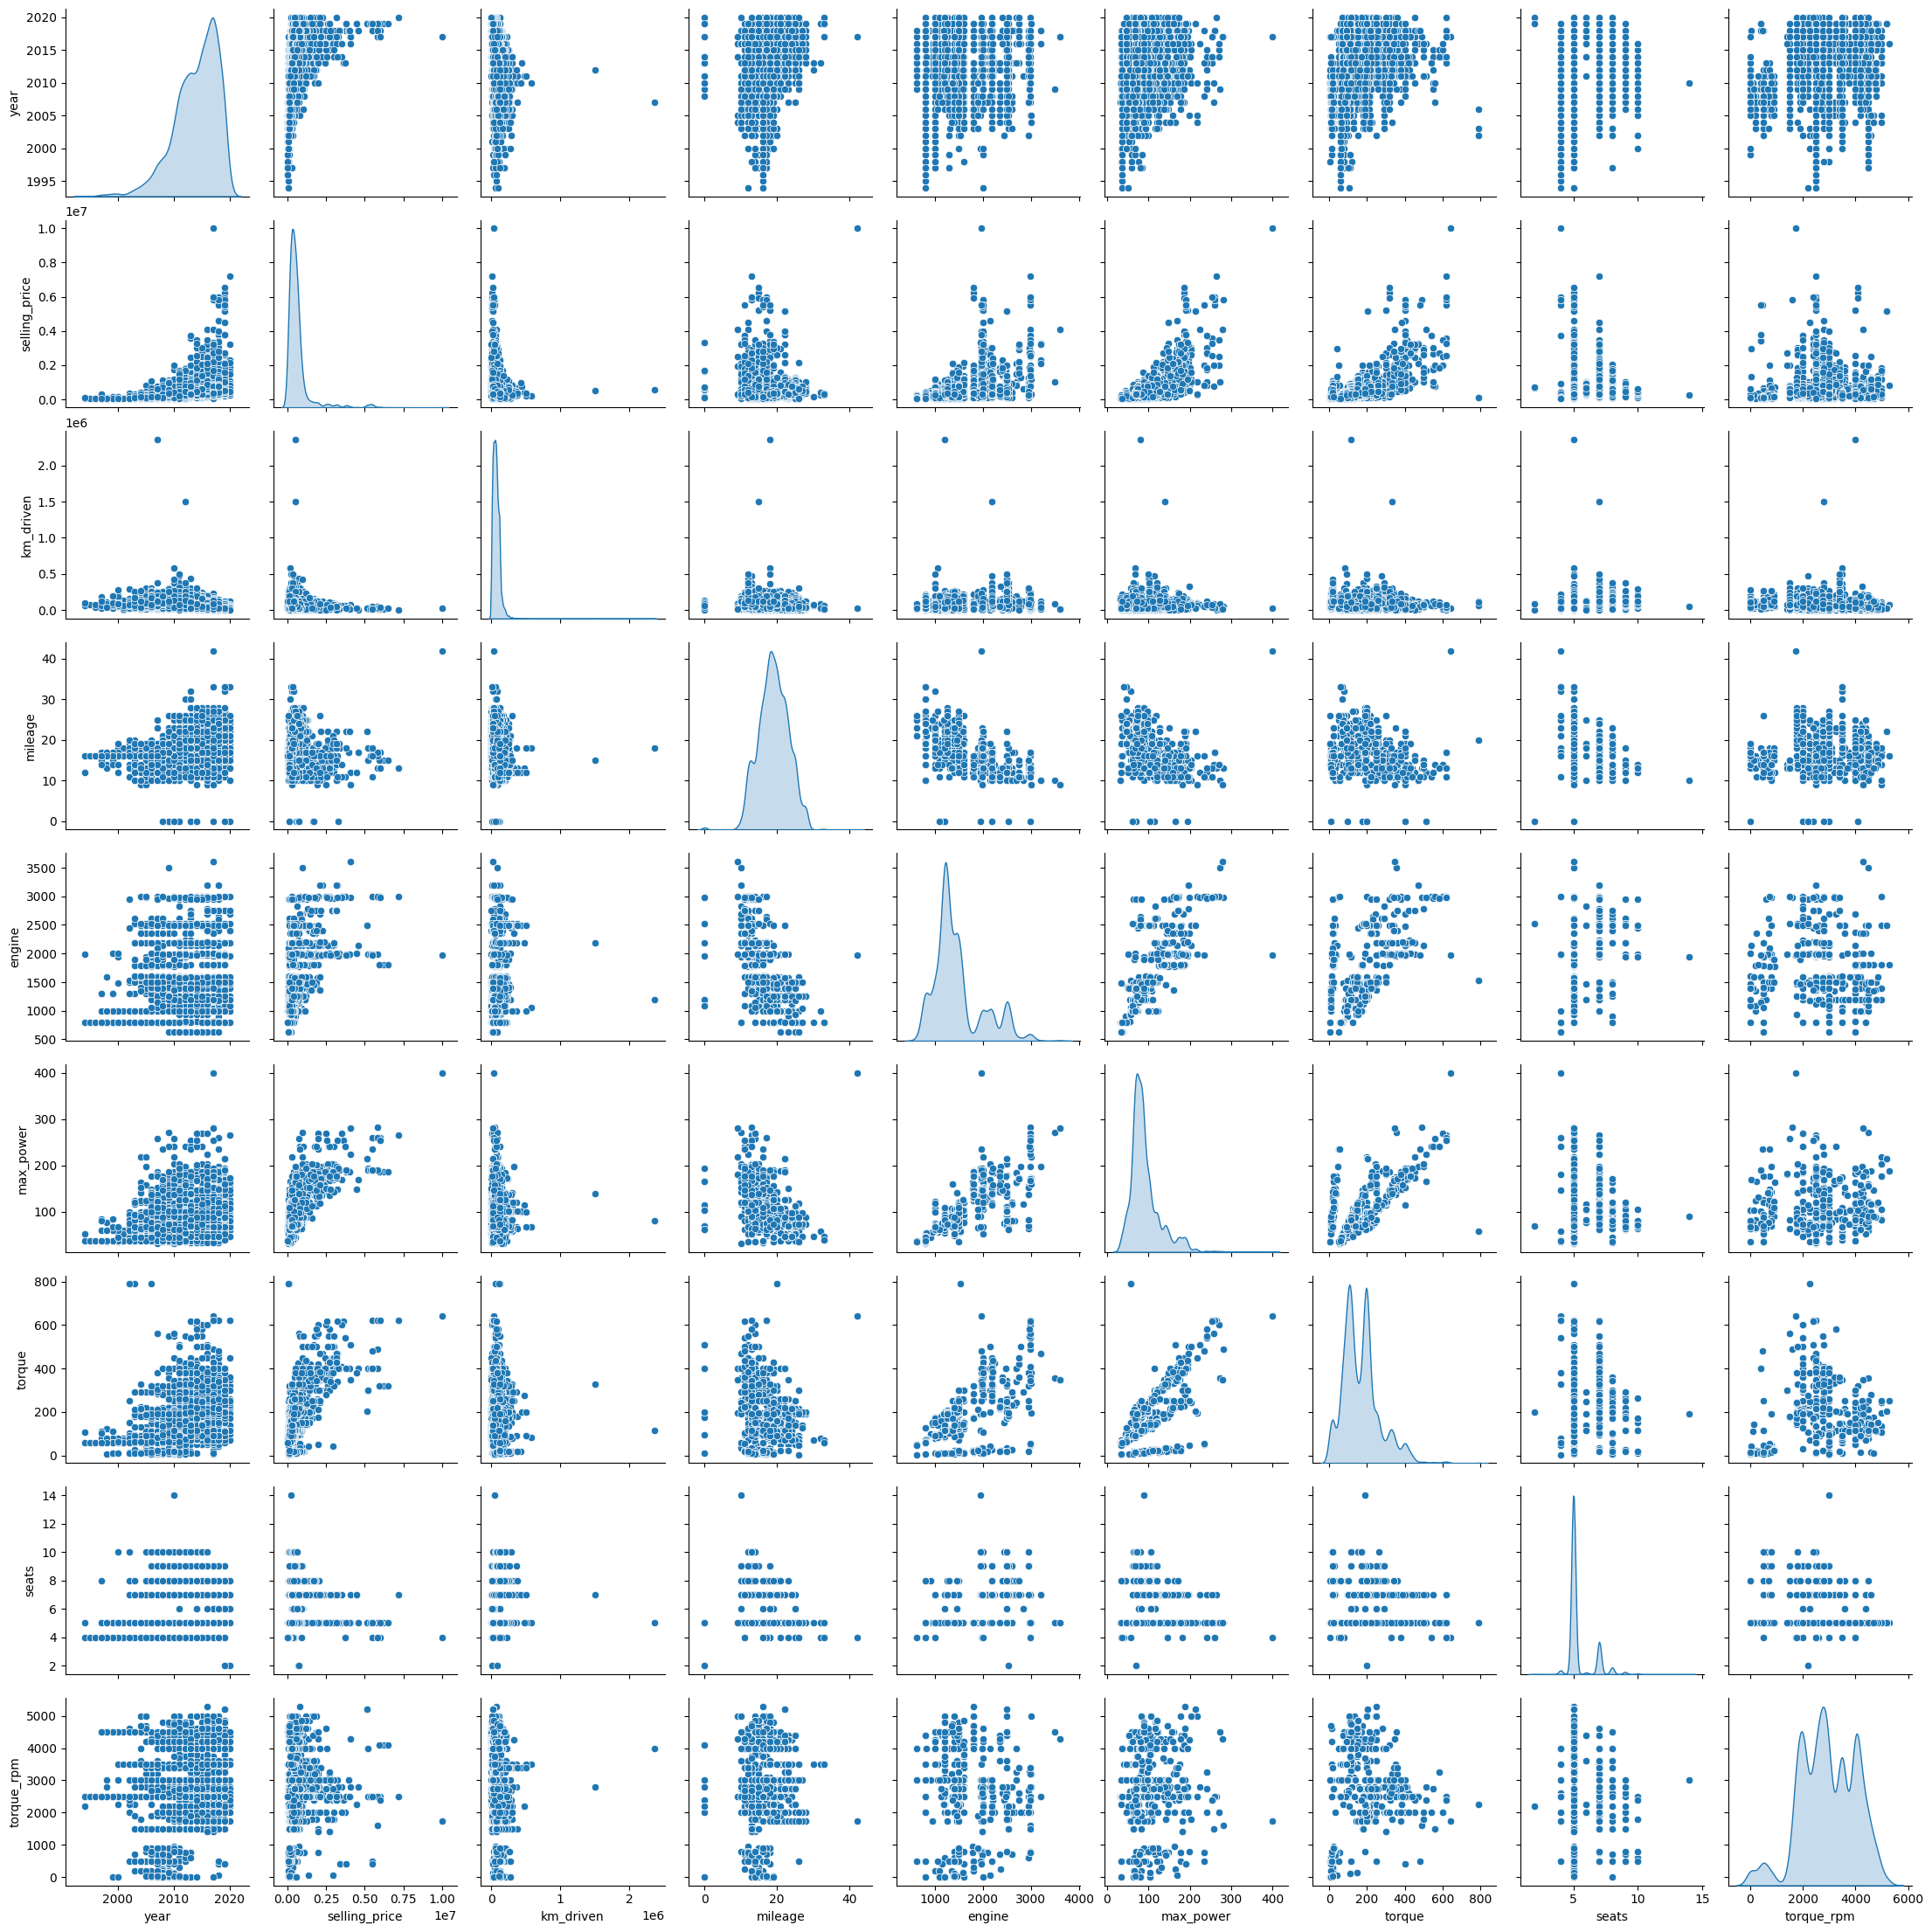

In [34]:
# pairplot of variables
sns.pairplot(df, diag_kind='kde')

In [35]:
df = df.drop('name', axis=1)

In [36]:
# One-hot encode 'fuel', 'seller_type', 'transmission', 'owner'
encoded_data = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# Ensure the encoded columns are of type int (0 and 1)
encoded_data[encoded_data.columns] = encoded_data[encoded_data.columns].astype(int)

#Display the first few rows of the encoded DataFrame
encoded_data.head()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,23,1248,74,190,5,2000,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000,21,1498,103,250,5,2500,1,0,0,1,0,1,0,1,0,0
2,2006,158000,140000,17,1497,78,12,5,700,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,23,1396,90,22,5,2750,1,0,0,1,0,1,0,0,0,0
4,2007,130000,120000,16,1298,88,11,5,500,0,0,1,1,0,1,0,0,0,0


In [37]:
#mileage', 'engine', 'max_power', 'torque'
x = encoded_data.drop(columns=['selling_price','mileage'], inplace=False)
y = encoded_data['selling_price']

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x[:3000], y[:3000], test_size=0.3)

In [39]:
random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)

In [40]:
random_model.fit(xtrain, ytrain)

y_pred = random_model.predict(xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

99.05 %


In [41]:
random_model_accuracy1 = round(random_model.score(xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

95.05 %


In [44]:
#R2 Score
acc_R=metrics.r2_score(ytest, y_pred)
acc_R

0.9504563834146211

In [45]:
k = 20

# Initialize K-Fold with the specified number of splits
kfold = KFold(n_splits=k, shuffle=True, random_state=20)

# Perform cross-validation
K_results = cross_val_score(random_model, x, y, cv=kfold)

# Calculate the mean accuracy
accuracy = np.mean(K_results)  # Use K_results directly, not absolute values
print("Mean Cross-Validation Accuracy:", accuracy)

Mean Cross-Validation Accuracy: 0.9717099468929661


**RESULT EVALUATION** 

(RANDOM FOREST)

Model Training Accuracy (99.05%):

This value indicates how well the model fits the training data. A high score (99.05%) shows that the model has learned the patterns in the training set very well.

Model Testing Accuracy (95.05%):

This accuracy is obtained when the model is tested on unseen data (xtest and ytest). A score of 95.05% shows that the model performs well on the test data but not as perfectly as on the training data, which is common and indicates the model generalizes well. 

The R² score represents how well the model explains the variability of the target variable (y). An R² score of 0.9504 indicates that the model explains approximately 95% of the variance in the test data. This is a good score, suggesting that the model captures most of the data's underlying patterns.

K-Fold Cross-Validation (Mean Accuracy: 0.9717):

Cross-validation helps assess the model's performance across multiple subsets of the data. With 20 folds, the mean accuracy across all the splits is 97.17%, suggesting that the model consistently performs well on different subsets of the data. This high score provides confidence that the model is not just fitting a particular split of the data but generalizes well across the whole dataset.


**Conclusion**

The analysis and model development provide several important insights:

Strong Predictive Features: Features such as max_power (0.75 correlation with selling price) and torque (0.62 correlation) are highly indicative of a car's selling price, confirming the significant impact of engine performance.
Moderate Predictors: Year of manufacture and kilometers driven show moderate correlations with selling price. Newer cars and those with fewer kilometers tend to sell for higher prices.
Fuel Efficiency and Engine Size: Larger engines tend to reduce mileage, with a strong negative correlation between engine size and fuel efficiency (-0.58), reflecting their role in higher fuel consumption.
Model Accuracy: The Random Forest model trained on this data achieves a training accuracy of 99.05% and a test accuracy of 95.05%, with an R² score of 0.9504, suggesting that the model explains a significant portion of the variance in selling price. Additionally, cross-validation yielded a mean accuracy of 97.17%, indicating robust generalization.

In [48]:
import pickle

# Save the trained model as a pickle file
with open('CarSelling.pickle', 'wb') as model_file:
    pickle.dump(random_model, model_file)